<a href="https://colab.research.google.com/github/leethanhvaan20302/desktop-tutorial/blob/main/HW(xe%20c%C3%A2n%20b%E1%BA%B1ng%20con%20l%E1%BA%AFc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ff2dcd36de0e3e42d2bc01578671c3ff1a197eb0e13de4a44f3e835cff4867f9
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


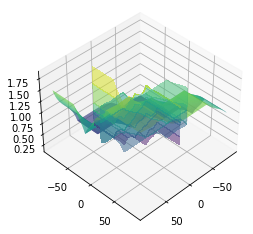

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

universe = np.linspace(-90,90,180) 
universe1 = np.linspace(-45,45,180) 
universe2 = np.linspace(0,2,120)   #f=ma

a = ctrl.Antecedent(universe,'a')
da  = ctrl.Antecedent(universe1,'da')
f=ctrl.Consequent(universe2,'F')

names = ["LN","N","ZE","P","LP"]   
a.automf(names=names)  
da.automf(names=names)
f.automf(names=names)

"""a.view()
da.view()
f.view()"""


rule0=ctrl.Rule((a['LN'] & da['LN'])|
                (a['N'] & da['LN'])|
                (a['LN'] & da['N'])
                ,consequent = f['LN'], label = 'rule LN')

rule1=ctrl.Rule((a['N'] & da['N'])|
                (a['ZE'] & da['LN'])|
                (a['LN'] & da['ZE'])|
                (a['LN'] & da['P'])|
                (a['N'] & da['ZE'])|
                (a['ZE'] & da['N'])|
                (a['P'] & da['LN'])
                ,consequent = f['N'], label = 'rule N')

rule2=ctrl.Rule((a['LN'] & da['LP'])|
                (a['N'] & da['P'])|
                (a['ZE'] & da['ZE'])|
                (a['P'] & da['N'])|
                (a['LP'] & da['N'])
                ,consequent = f['ZE'], label = 'rule ZE')

rule3=ctrl.Rule((a['ZE'] & da['LP'])|
                (a['ZE'] & da['P'])|
                (a['P'] & da['ZE'])|
                (a['LP'] & da['LN'])|
                (a['N'] & da['LP'])|
                (a['LP'] & da['ZE'])
                ,consequent = f['P'], label = 'rule P')

rule4=ctrl.Rule((a['P'] & da['LP'])|
                (a['P'] & da['P'])|
                (a['LP'] & da['P'])|
                (a['LP'] & da['LP'])
                ,consequent = f['LP'], label = 'rule LP')


system= ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3,rule4]) 
sim= ctrl.ControlSystemSimulation(system,flush_after_run=180*180+1)
upsampled= np.linspace(-90,90,180) 
x,y= np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(180):
  for j in range(180):
    sim.input['a']=x[i,j]
    sim.input['da']=y[i,j]
    sim.compute()
    z[i,j]= sim.output['F']

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig= plt.Figure(figsize=(10,10))    # cho lớn hơn 8 để có độ phân giải tốt hơn 
ax= plt.axes(projection = '3d')

suf= ax.plot_surface(x,y,z,rstride =1, cstride= 1, cmap = 'viridis', linewidth =0.4, antialiased= True)
cset= ax.contourf(x,y,z,zdir='z', offset=9, cmap= 'viridis', alpha= 0.5)
cset= ax.contourf(x,y,z,zdir='x', offset=11, cmap= 'viridis', alpha= 0.5)
cset= ax.contourf(x,y,z,zdir='y', offset=11, cmap= 'viridis', alpha= 0.5)
ax.view_init(40,45)

